In [1]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Rescaling
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall

2025-04-22 09:02:25.172043: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 09:02:25.240884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745312545.278951   58178 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745312545.289447   58178 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-22 09:02:25.374695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Useful for getting the number of classes
folders = glob('/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/train/*')


In [3]:
# Paths to datasets
train_path = '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/train'
valid_path = '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/val'


In [4]:

# Load VGG19 model with pre-trained weights, remove the top layers
vgg = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a Global Average Pooling layer to fix the shape issue
x = GlobalAveragePooling2D()(vgg.output)

# Add a custom Dense layer for classification
# Assuming `folders` is a list of the classes
prediction = Dense(len(folders), activation='softmax')(x)

# Create the final model
model = Model(inputs=vgg.input, outputs=prediction)

# Print the model summary
model.summary()


2025-04-20 15:35:09.264545: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 20,026,949 (76.40 MB)

 Trainable params: 20,026,949 (76.40 MB)

 Non-trainable params: 0 (0.00 B)

##compile the model

In [5]:
from tensorflow.keras.optimizers import Adam

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),  # Utilisez l'objet Adam pour configurer le taux d'apprentissage
    metrics=['accuracy']
)


Data augmentation and preprocessing

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_set = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1204 images belonging to 5 classes.
Found 344 images belonging to 5 classes.


Train the model

In [ ]:
# Train the model
r = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(validation_set)
)

 #Plot loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('vgg19LossVal_loss.png')

 #Plot accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('vgg19AccVal_acc.png')

 #Save the model
model.save('VGG19_model.h5')

/home/aissata/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 991s 25s/step - accuracy: 0.3146 - loss: 1.4636 - val_accuracy: 0.4070 - val_loss: 1.2817
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 928s 24s/step - accuracy: 0.4635 - loss: 1.2548 - val_accuracy: 0.5087 - val_loss: 0.9865
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 894s 24s/step - accuracy: 0.4987 - loss: 1.0986 - val_accuracy: 0.6221 - val_loss: 0.8886
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 894s 24s/step - accuracy: 0.5748 - loss: 0.8916 - val_accuracy: 0.7180 - val_loss: 0.6582
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1555s 41s/step - accuracy: 0.7290 - loss: 0.6290 - val_accuracy: 0.8576 - val_loss: 0.3472
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 956s 25s/step - accuracy: 0.8407 - loss: 0.4669 - val_accuracy: 0.8895 - val_loss: 0.3100
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 898s 23s/step - accuracy: 0.8810 - loss: 0.2829 - val_accuracy: 0.8750 - val_loss: 0.2647
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 868s 23s/step - accuracy: 0.8926 - loss: 0.2605 - val_accuracy: 0

In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/home/aissata/Downloads/ICRISAT/groundnut-leaf-diseases/image_plant/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#rescale_layer = Rescaling(1./255)
#test_set = test_set.map(lambda x, y: (rescale_layer(x), y))


Found 172 files belonging to 5 classes.


In [9]:
# Évaluer le modèle
test_loss, test_acc = model.evaluate(test_set)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_acc:.4f}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.9705 - loss: 11.7209
Test Loss: 11.9524
Test Accuracy: 0.9651


In [10]:
class_name = test_set.class_names
class_name

['ALTERNARIA LEAF SPOT',
 'HEALTHY',
 'LEAF SPOT (EARLY AND LATE)',
 'ROSETTE',
 'RUST']

In [11]:
y_pred = model.predict(test_set)
Y_pred = tf.argmax(y_pred, axis=1)
Y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [12]:
import tensorflow as tf
true_categories = tf.concat([y for _, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)
Y_true


2025-03-05 08:51:16.212238: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(172,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])>

In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred,target_names=class_name))

                            precision    recall  f1-score   support

      ALTERNARIA LEAF SPOT       0.98      0.98      0.98        45
                   HEALTHY       0.98      0.95      0.97        60
LEAF SPOT (EARLY AND LATE)       0.98      0.96      0.97        45
                   ROSETTE       0.77      1.00      0.87        10
                      RUST       1.00      1.00      1.00        12

                  accuracy                           0.97       172
                 macro avg       0.94      0.98      0.96       172
              weighted avg       0.97      0.97      0.97       172



/home/aissata/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/aissata/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


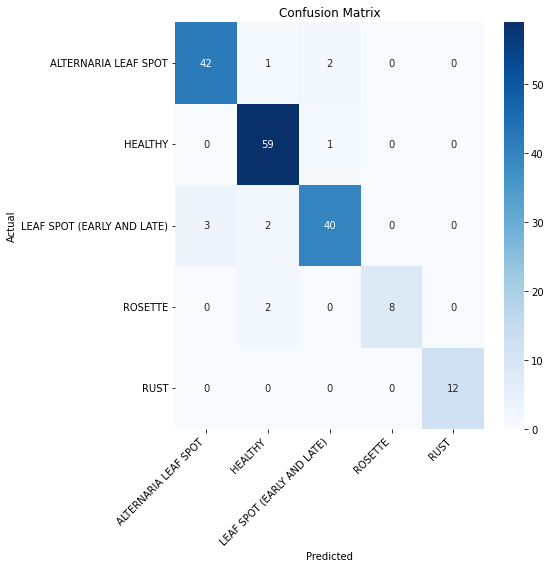

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define class names
class_names = [
    "ALTERNARIA LEAF SPOT",
    "HEALTHY",
    "LEAF SPOT (EARLY AND LATE)",
    "ROSETTE",
    "RUST"
]

# Your confusion matrix values
cm = np.array([
    [42,  1,  2, 0, 0],
    [ 0, 59,  1, 0, 0],
    [ 3,  2, 40, 0, 0],
    [ 0,  2,  0, 8, 0],
    [ 0,  0,  0, 0, 12]
])

# Plot
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the figure
plt.savefig("confusion_matrix vgg16.png", dpi=300)  # You can change the path and dpi as needed
plt.show()
